In [1]:
import tensorflow as tf
import numpy as np
import sys
##### sys.path.append('project path') #####
from matplotlib import pyplot as plt
import pickle
from communication_game.utils.plot_helpers import *
from scipy.stats import ttest_ind

# mode: basic 

Sender and receiver have the same bias.

### without zero shot

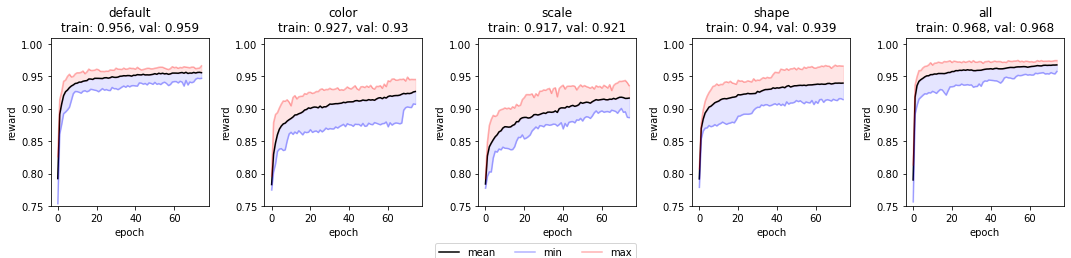

In [2]:
vs = 4
ml = 3
runs = ['default','color','scale','shape','all']
show_results_multiples(runs, vs, ml, subplots=(1,5), ylim=[0.75,1.01], n_runs=10)

In [3]:
show_accuracies(runs, vs, ml, n_runs=10)


default
train reward:  0.956 +- 0.006
val reward:  0.959 +- 0.006

color
train reward:  0.928 +- 0.012
val reward:  0.93 +- 0.014

scale
train reward:  0.915 +- 0.012
val reward:  0.921 +- 0.011

shape
train reward:  0.937 +- 0.018
val reward:  0.939 +- 0.018

all
train reward:  0.968 +- 0.006
val reward:  0.968 +- 0.006


In [4]:
show_acquisition_speed(runs, vs, ml, [0.87, 0.9, 0.93], n_runs=10)

acquisition speed
default train [ 2.9  5.  13.9]+-[1.136 2.793 9.492] , val [2.1 4.1 9.5]+-[1.136 2.879 4.717]
color train [16.1 46.7  nan]+-[14.686 35.679    nan] , val [11.  39.7  nan]+-[ 6.603 35.755    nan]
scale train [20.7 73.3  nan]+-[13.95 33.29   nan] , val [16.7 53.3  nan]+-[12.394 30.384    nan]
shape train [ 3.8 16.5  nan]+-[ 1.4   16.573    nan] , val [ 3.1 12.9  nan]+-[ 1.868 16.282    nan]
all train [2.1 2.8 8.5]+-[ 0.3    0.748 10.395] , val [1.6 2.3 6.6]+-[0.49  0.458 8.261]


In [5]:
show_rsas(runs, vs, ml, n_runs=10)

RSA
default , nsender-input 0.289+-0.034 , receiver-input 0.378+-0.021 , sender-receiver 0.561+-0.057
color , nsender-input 0.3+-0.036 , receiver-input 0.38+-0.02 , sender-receiver 0.607+-0.053
scale , nsender-input 0.326+-0.031 , receiver-input 0.381+-0.02 , sender-receiver 0.587+-0.089
shape , nsender-input 0.291+-0.036 , receiver-input 0.379+-0.021 , sender-receiver 0.627+-0.064
all , nsender-input 0.359+-0.055 , receiver-input 0.509+-0.023 , sender-receiver 0.546+-0.07


#### analysis statistical significance

In [6]:
ttests('default', 'all', n_runs=10)

t test results, values rounded to 5 decimals 

train reward 0.00105
validation reward 0.00653
speed 0.87 0.05597
speed 0.90 0.03483
speed 0.93 0.26484
zero-shot 0.24248
rsa sender-input 0.00458
rsa receiver-input 0.0
rsa sender-receiver 0.61216


### with zero-shot

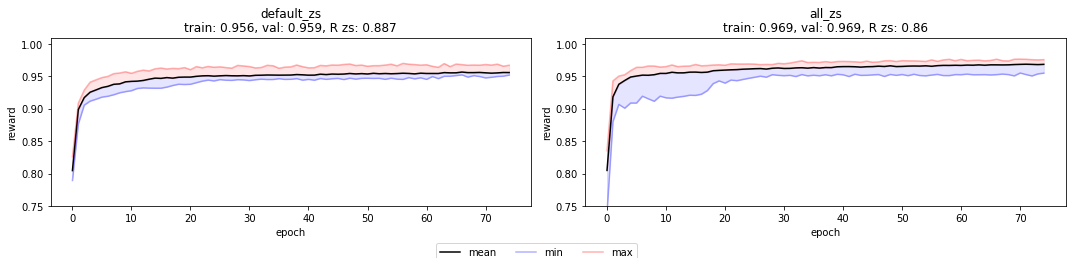

In [7]:
vs = 4
ml = 3
runs = ['default_zs', 'all_zs']
show_results_multiples(runs, vs, ml, subplots=(1,2), n_runs=10, ylim=[0.75,1.01])

In [8]:
show_accuracies(runs, vs, ml, n_runs=10)


default_zs
train reward:  0.956 +- 0.004
val reward:  0.959 +- 0.004
zero shot 0.887 +- 0.026

all_zs
train reward:  0.969 +- 0.006
val reward:  0.969 +- 0.006
zero shot 0.86 +- 0.06
Ttest_indResult(statistic=1.2085221732396767, pvalue=0.24248388836485366)


# mode: mixed

Sender and receiver have different biases

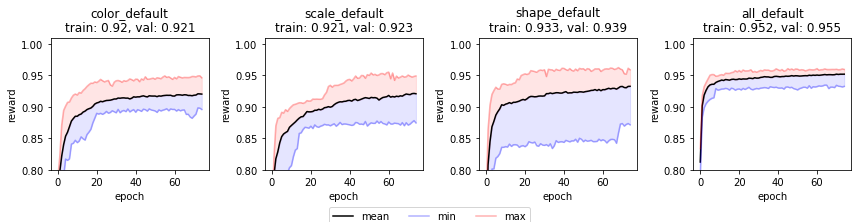

In [9]:
vs = 4
ml = 3
runs = ['color_default', 'scale_default','shape_default','all_default']
show_results_multiples(runs, vs, ml, mode='mixed', subplots=(1,5), n_runs=10, figsize=(15,3))

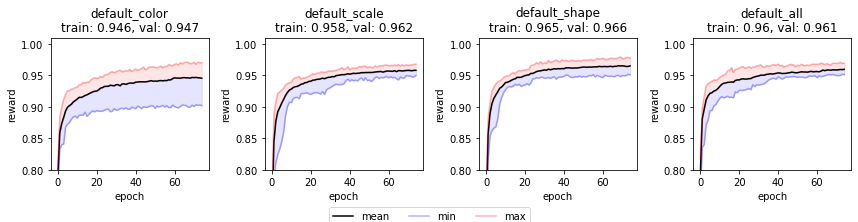

In [11]:
vs = 4
ml = 3
runs = ['default_color','default_scale','default_shape','default_all']
show_results_multiples(runs, vs, ml, mode='mixed', subplots=(1,5), n_runs=10, figsize=(15,3))